In [3]:
import networkx as nx
import pandas as pd
import sys
import matplotlib.pyplot as plt
sys.path.append("..")  # Add the parent directory (where hex_maze_utils lives) to the path

from hex_maze_utils import plot_hex_maze, get_barrier_changes

# Load the database of different barrier sequences
barrier_df = pd.read_pickle('../Barrier_Sequence_Databases/barrier_sequences_first1000.pkl')
display(barrier_df)

,barrier_sequence,sequence_length,reward_path_lengths,choice_points
0,"[(37, 7, 39, 41, 14, 46, 20, 23, 30), (37, 39,...",5,"[[15, 17, 21], [15, 21, 19], [15, 17, 19], [23...","[{13}, {26}, {26, 13, 29}, {29}, {13}]"
1,"[(34, 36, 37, 39, 10, 45, 14, 15, 20), (34, 37...",6,"[[17, 21, 19], [19, 21, 17], [19, 15, 17], [17...","[{21}, {30}, {24}, {16, 24, 26}, {24}, {35}]"
2,"[(34, 7, 41, 11, 46, 17, 20, 28, 31)]",1,"[[23, 19, 17]]",[{35}]
3,"[(34, 10, 42, 12, 45, 18, 23, 25, 31), (34, 37...",6,"[[15, 19, 21], [15, 19, 17], [21, 19, 15], [21...","[{17}, {17, 26, 35}, {35}, {24}, {24, 17, 26},..."
4,"[(39, 9, 10, 46, 21, 22, 23, 26, 30)]",1,"[[23, 17, 17]]",[{29}]
...,...,...,...,...
995,"[(32, 34, 45, 13, 14, 15, 18, 19, 25), (32, 34...",2,"[[19, 17, 15], [19, 15, 17]]","[{35}, {24}]"
996,"[(37, 7, 40, 13, 46, 45, 18, 25, 28), (37, 7, ...",2,"[[15, 19, 17], [17, 19, 15]]","[{26}, {36}]"
997,"[(36, 10, 11, 46, 15, 21, 25, 27, 29)]",1,"[[19, 15, 21]]",[{16}]
998,"[(32, 8, 9, 41, 15, 20, 21, 27, 29), (32, 8, 9...",2,"[[17, 21, 15], [17, 15, 21]]","[{31}, {13}]"


In [4]:
def plot_barrier_change_sequence(barrier_sequence):
    '''
    Given a sequence of barrier sets that each differ by the movement of 
    a single barrier, plot each maze in the sequence with the moved barriers
    indicated on each maze.
    
    Open hexes are shown in light blue, connected by thin grey lines.
    Barriers are shown in dark grey. Choice point(s) are in yellow.
    The now-open hex where the barrier used to be is shown in pale red.
    The new barrier is shown in dark red.
    
    Args:
    barrier_sequence (list of sets): List of sequential barrier sets
    '''
    
    # Find the barriers moved from one configuration to the next
    barrier_changes = get_barrier_changes(barrier_sequence)
    
    # First print and plot the first barrier set
    print(f"Barrier set 0: {barrier_sequence[0]}")
    plot_hex_maze(barrier_sequence[0])
    
    # Now print barrier change info and plot each successive barrier set
    for i, (barriers, (old_barrier, new_barrier)) in enumerate(zip(barrier_sequence[1:], barrier_changes)):
        print(f"Barrier change: {old_barrier} -> {new_barrier}")
        print(f"Barrier set {i+1}: {barriers}")
        plot_hex_maze(barriers, old_barrier, new_barrier)
    

In [7]:
# Get an example barrier sequence
i = 1
barrier_sequence = barrier_df.iloc[i]['barrier_sequence']

# Print the barrier changes
barrier_changes = get_barrier_changes(barrier_sequence)
print(f"Barrier changes: {barrier_changes}\n")

Barrier changes: [[36, 26], [20, 25], [26, 46], [10, 13], [39, 19]]



Barrier set 0: frozenset({34, 36, 37, 39, 10, 45, 14, 15, 20})


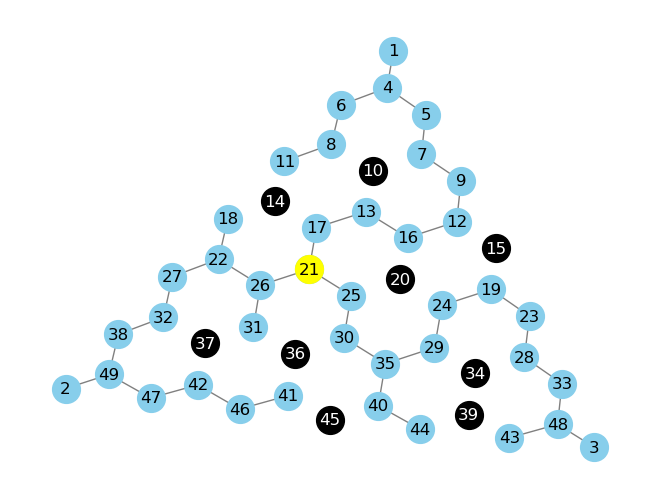

Barrier change: 36 -> 26
Barrier set 1: frozenset({34, 37, 39, 10, 45, 14, 15, 20, 26})


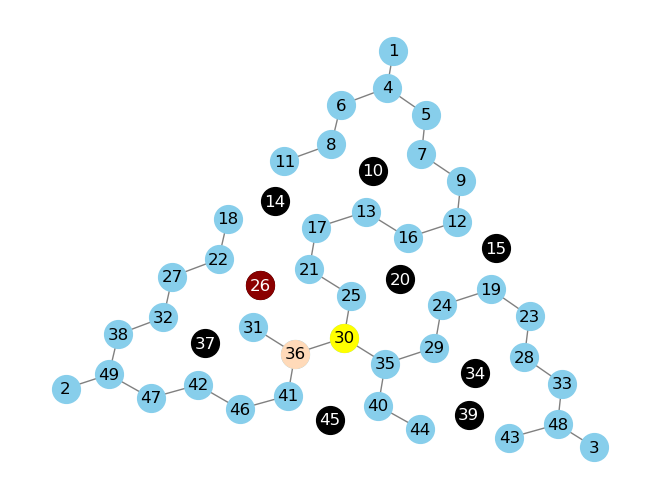

Barrier change: 20 -> 25
Barrier set 2: frozenset({34, 37, 39, 10, 45, 14, 15, 25, 26})


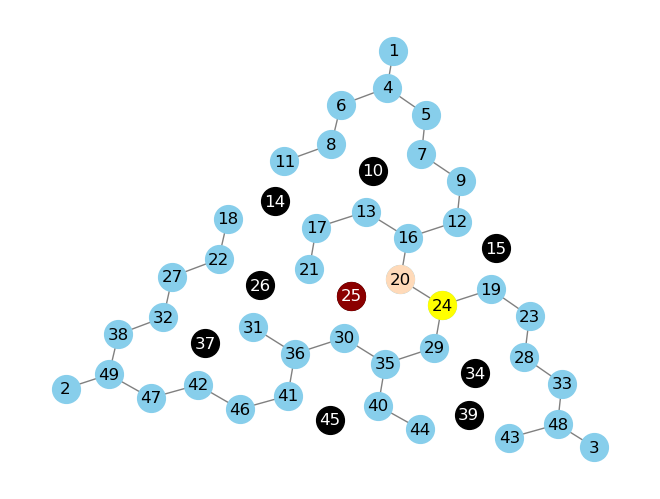

Barrier change: 26 -> 46
Barrier set 3: frozenset({34, 37, 39, 10, 45, 14, 15, 46, 25})


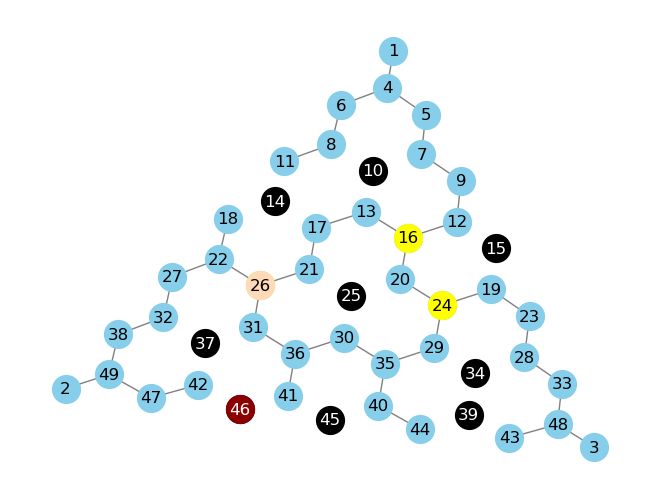

Barrier change: 10 -> 13
Barrier set 4: frozenset({34, 37, 39, 45, 46, 14, 13, 15, 25})


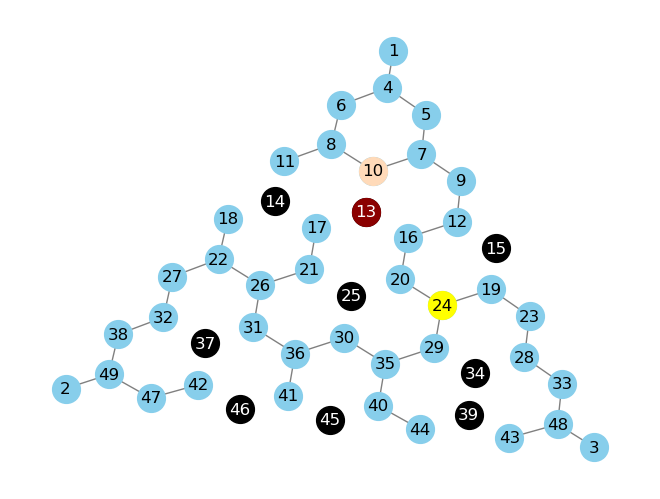

Barrier change: 39 -> 19
Barrier set 5: frozenset({34, 37, 45, 46, 15, 14, 13, 19, 25})


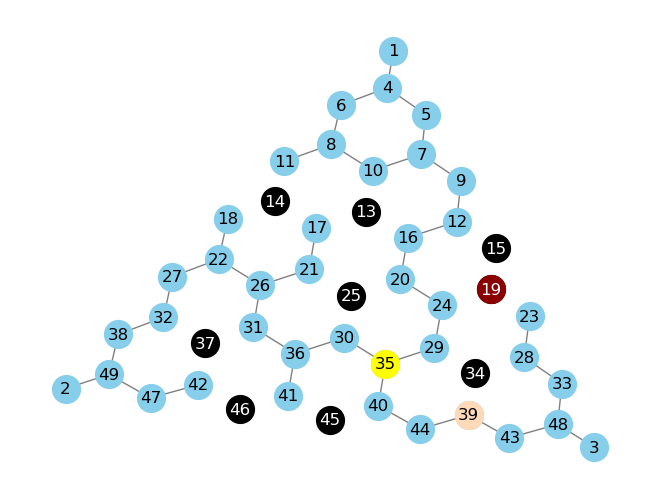

In [8]:
# Plot the barrier changes
plot_barrier_change_sequence(barrier_sequence)